# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [10]:
apple = pd.read_csv("appl_1980_2014.csv")

In [11]:
apple.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


### Step 4.  Check out the type of the columns

In [12]:
apple.columns.dtype

dtype('O')

### Step 5. Transform the Date column as a datetime type

In [13]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [14]:
apple.set_index('Date', inplace = True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [15]:
apple.duplicated()

Date
2014-07-08    False
2014-07-07    False
2014-07-03    False
2014-07-02    False
2014-07-01    False
              ...  
1980-12-18    False
1980-12-17    False
1980-12-16    False
1980-12-15    False
1980-12-12    False
Length: 8465, dtype: bool

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [16]:
apple.sort_values(by = 'Date', inplace = True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [19]:
apple[apple.index.is_month_end]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
1981-06-30,26.13,26.13,26.00,26.00,8976800,0.41
1981-07-31,25.00,25.12,25.00,25.00,2738400,0.39
...,...,...,...,...,...,...
2014-01-31,495.18,501.53,493.55,500.60,116199300,70.69
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25


### Step 10.  What is the difference in days between the first day and the oldest

In [22]:
first_day = apple.index.sort_values(ascending = True)[0]
last_day = apple.index.sort_values(ascending = True)[-1]
(last_day - first_day).days

12261

### Step 11.  How many months in the data we have?

In [23]:
(last_day.year - first_day.year) * 12 - (last_day.month - first_day.month)

413

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

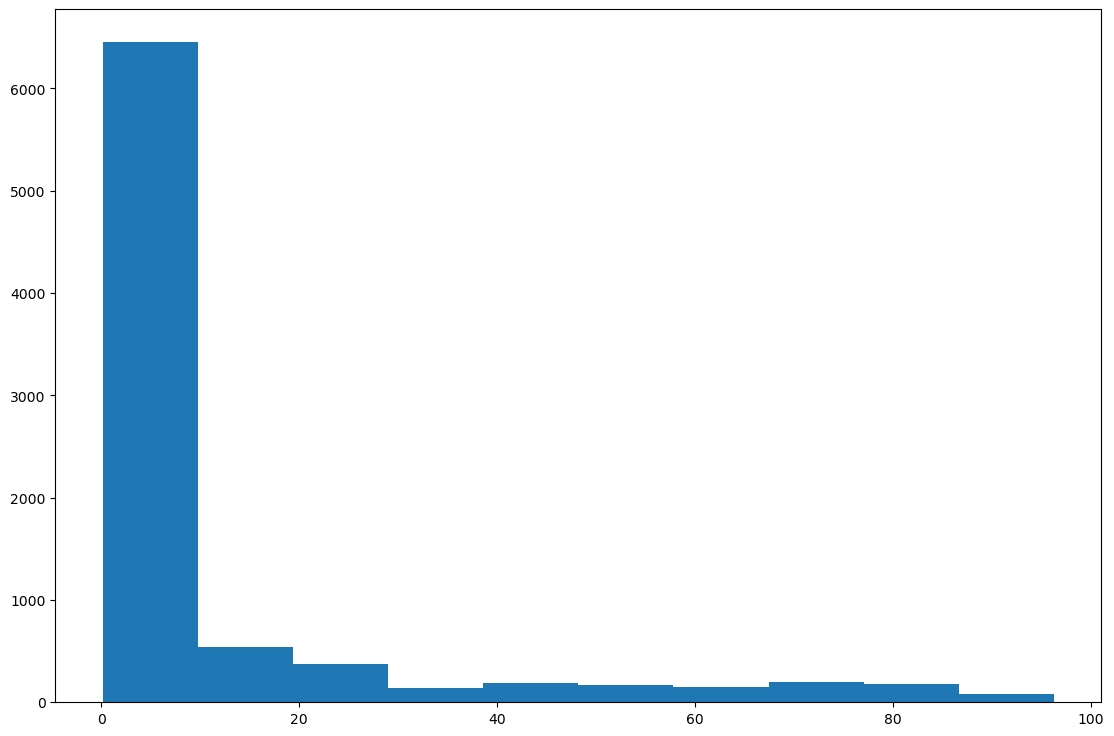

In [25]:
plt.figure(figsize = (13.5,9))
plt.hist(apple['Adj Close']);

### BONUS: Create your own question and answer it.